# How to Test for Normality (4 Methods)

Many statistical tests make the assumption that datasets are normally distributed.

There are four common ways to check this assumption in Python:

1. (Visual Method) Create a histogram.
If the histogram is roughly “bell-shaped”, then the data is assumed to be normally distributed.

2. (Visual Method) Create a Q-Q plot.
If the points in the plot roughly fall along a straight diagonal line, then the data is assumed to be normally distributed.

3. (Formal Statistical Test) Perform a Shapiro-Wilk Test.
If the p-value of the test is greater than α = .05, then the data is assumed to be normally distributed.

4. (Formal Statistical Test) Perform a Kolmogorov-Smirnov Test.
If the p-value of the test is greater than α = .05, then the data is assumed to be normally distributed.ly distributed.

# Method 1: Create a Histogram
The following code shows how to create a histogram for a dataset that follows a log-normal distribution:

(array([110., 307., 247., 168.,  84.,  37.,  28.,  10.,   3.,   3.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.59044299,  1.54462417,  2.49880535,  3.45298653,  4.40716771,
         5.36134889,  6.31553007,  7.26971125,  8.22389243,  9.17807361,
        10.13225479, 11.08643597, 12.04061715, 12.99479833, 13.94897951,
        14.90316069, 15.85734187, 16.81152305, 17.76570423, 18.71988542,
        19.6740666 ]),
 <BarContainer object of 20 artists>)

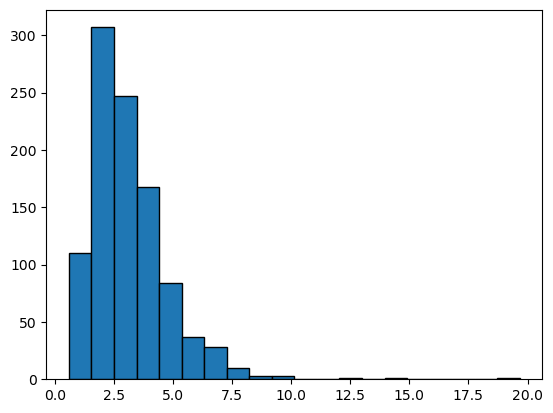

In [1]:
import math
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#create histogram to visualize values in dataset
plt.hist(lognorm_dataset, edgecolor='black', bins=20)

By simply looking at this histogram, we can tell the dataset does not exhibit a “bell-shape” and is not normally distributed.

# Method 2: Create a Q-Q plot
The following code shows how to create a Q-Q plot for a dataset that follows a log-normal distribution:

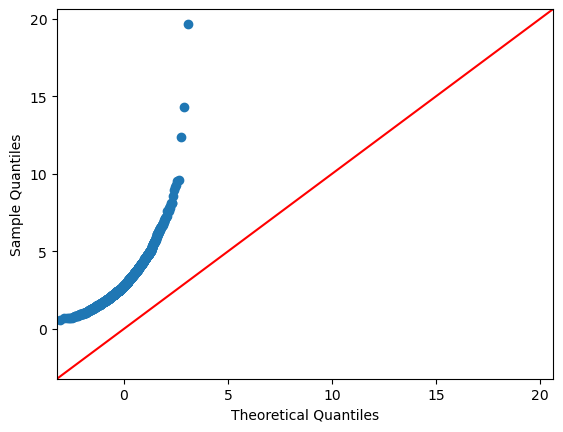

In [2]:
import math
import numpy as np
from scipy.stats import lognorm
import statsmodels.api as sm
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(lognorm_dataset, line='45')

plt.show()


If the points on the plot fall roughly along a straight diagonal line, then we typically assume a dataset is normally distributed.

However, the points on this plot clearly don’t fall along the red line, so we would not assume that this dataset is normally distributed.

This should make sense considering we generated the data using a log-normal distribution function.

# Method 3: Perform a Shapiro-Wilk Test
The following code shows how to perform a Shapiro-Wilk for a dataset that follows a log-normal distribution:

In [3]:
import math
import numpy as np
from scipy.stats import shapiro 
from scipy.stats import lognorm

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#perform Shapiro-Wilk test for normality
shapiro(lognorm_dataset)


ShapiroResult(statistic=0.8573322892189026, pvalue=3.880496661488187e-29)

From the output we can see that the test statistic is 0.857 and the corresponding p-value is 3.88e-29 (extremely close to zero).

Since the p-value is less than .05, we reject the null hypothesis of the Shapiro-Wilk test.

This means we have sufficient evidence to say that the sample data does not come from a normal distribution.

# Method 4: Perform a Kolmogorov-Smirnov Test
The following code shows how to perform a Kolmogorov-Smirnov test for a dataset that follows a log-normal distribution:

In [4]:
import math
import numpy as np
from scipy.stats import kstest
from scipy.stats import lognorm

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#perform Kolmogorov-Smirnov test for normality
kstest(lognorm_dataset, 'norm')

KstestResult(statistic=0.84125708308077, pvalue=0.0)

From the output we can see that the test statistic is 0.841 and the corresponding p-value is 0.0.

Since the p-value is less than .05, we reject the null hypothesis of the Kolmogorov-Smirnov test.

This means we have sufficient evidence to say that the sample data does not come from a normal distribution.

# Chi-square test
The Chi-square goodness of fit test checks whether your sample data is likely to be from a specific theoretical distribution. We have a set of data values, and an idea about how the data values are distributed. 

In [5]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
from IPython.display import display
# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline

In [6]:
# no of hours a student studies
# in a week vs expected no of hours
observed_data = [10, 20, 30, 40, 50]
expected_data = [51, 38, 32, 18, 11]

In [7]:
# Chi-Square Goodness of Fit Test
chi_square, p_value = stats.chisquare(
    observed_data, expected_data)
  
# chi square test statistic and p value
print("Chi-square statistic:", round(chi_square, 5))
print("p-value:", round(p_value, 5))

Chi-square statistic: 206.77372
p-value: 0.0


In [8]:
# the degrees of freedom, df, formula is
nrows = 2
ncols = len(observed_data)
df = (nrows - 1) * (ncols - 1)
print("Degrees of freedom:", round(df, 5))

# significance level
alpha = 0.05

# find Chi-Square critical value
critical_value = stats.chi2.ppf(q = 1-alpha, # Find the critical value for 95% confidence*
                      df = df)   # Df = number of variable categories - 1

print("Critical value:", round(critical_value, 5))

conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("Chisquare-score is:", round(chi_square, 5), " and critical value is:", round(critical_value, 5))
print(conclusion)

Degrees of freedom: 4
Critical value: 9.48773
Chisquare-score is: 206.77372  and critical value is: 9.48773
Null Hypothesis is rejected.


# χ2  goodness-of-fit test: another example
https://www.geo.fu-berlin.de/en/v/soga-py/Basics-of-statistics/Hypothesis-Tests/Chi-Square-Tests/Chi-Square-Goodness-of-Fit-Test/index.html

In [9]:
import pandas as pd
import numpy as np

students = pd.read_csv("https://userpage.fu-berlin.de/soga/data/raw-data/students.csv")

Recall χ2 goodness-of-fit tests are applied for qualitative (categorical) or discrete quantitative variables. There are several categorical variables in the students data set, such as gender, religion, major, minor and graduated.

In order to showcase the χ2 goodness-of-fit test, we examine if religions are equally distributed among students compared to the distribution of religions among the population of the European Union. The data on the continental scale is provided in the report "Discrimination in the EU in 2012" (European Union: European Commission, Special Eurobarometer, 393, p. 233).

The report provides data for eight categories of how people ascribed themselves:

- 48 % as Catholic
- 16 % as Non believers/Agnostic
- 12 % as Protestant
- 8% as Orthodox
- 7% as Atheist
- 4 % as Other Christian
- 3 % as Other religion/None stated
- 2 % as Muslim. 

<AxesSubplot:ylabel='None'>

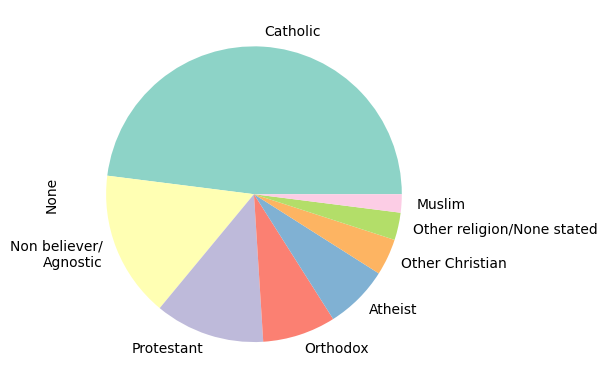

In [10]:
import seaborn as sns

data = [48, 16, 12, 8, 7, 4, 3, 2]
religions = ["Catholic", "Non believer/\nAgnostic", "Protestant", 
             "Orthodox", "Atheist", "Other Christian",
             "Other religion/None stated", "Muslim"]

data = pd.Series(data, index = religions)

data.plot.pie(colors = sns.color_palette("Set3", 8))

In [11]:
print(students["religion"].unique())


['Muslim' 'Other' 'Protestant' 'Catholic' 'Orthodox']


In [12]:
data_raw = [48, 2, 8, (16 + 7 + 4 + 3), 12]
religions = ["Catholic", "Muslim", "Orthodox", "Other", "Protestant"]

data = pd.Series(data_raw, index = religions, name = "relative_frequency") / 100
data.to_frame()

,relative_frequency
Catholic,0.48
Muslim,0.02
Orthodox,0.08
Other,0.30
Protestant,0.12


In [13]:
n = 500

sample = students.sample(n, random_state = 8).groupby(["religion"])
sample.size().to_frame("Oberserved Frequencies")

,Oberserved Frequencies
religion,
Catholic,157
Muslim,24
Orthodox,38
Other,207
Protestant,74


In [14]:
df = pd.DataFrame({'relative frequencies' : data,
                   'observed frequencies' : sample.size()})
df

,relative frequencies,observed frequencies
Catholic,0.48,157
Muslim,0.02,24
Orthodox,0.08,38
Other,0.30,207
Protestant,0.12,74


The data set can be analyzed with the χ2 goodness-of-fit test. Recall the question we are interested in: Is the religion equally distributed among students compared to the distribution of the religion among the population of the European Union?



In [15]:
df["expected frequencies"] = df["relative frequencies"] * n
df

,relative frequencies,observed frequencies,expected frequencies
Catholic,0.48,157,240.0
Muslim,0.02,24,10.0
Orthodox,0.08,38,40.0
Other,0.30,207,150.0
Protestant,0.12,74,60.0


In [16]:
alpha = 0.01

In [17]:
O_E = (df["observed frequencies"] - df["expected frequencies"]) ** 2
chi_squared = np.sum(O_E / df["expected frequencies"])
chi_squared

73.33083333333333

In [18]:
from scipy.stats import chi2

p = 1 - chi2.cdf(chi_squared, df = df.shape[0] - 1)
p

4.440892098500626e-15

If p≤α, reject H0; otherwise, do not reject H0

In [19]:
# reject H0?
p < alpha

True

The p-value is smaller than the specified significance level of 0.01; we reject H0. The test results are statistically significant at the 1 % level and provide very strong evidence against the null hypothesis.
At the 1 % significance level the data provides very strong evidence to conclude, that the religion distribution among students differs from the religion distribution of the population of the European Union.